In [1]:
#get the libraries
#REFERENCE: [17], [18], [18]
import numpy as nump
import pandas as pand 
import matplotlib.pyplot as pyp
import seaborn as sbn
import random
from collections import Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as logReg
from sklearn.tree import DecisionTreeClassifier as deTrC
from sklearn.ensemble import RandomForestClassifier as ranFoC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
#get access to google drive for data set
from google.colab import drive as gD
gD.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [3]:
#REFERENCE: [17]
#locate the credit card data set
ccDts = pand.read_csv("/content/drive/MyDrive/creditcard.csv")

In [4]:
#REFERENCE: [17]
#showcase from file 11 records
ccDts.head(11)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
#REFERENCE: [17]
print(ccDts.shape) 
print(ccDts.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [6]:
#REFERENCE: [17]
ntCcFd = ccDts[ccDts['Class'] == 0] #Not Fraud
ccFd = ccDts[ccDts['Class'] == 1] #Fraud
#get the percentage of fraud from data set
findPerFd=(len(ccFd)/float(ccDts.shape[0]))*100
#get the percentage of not fraud from data set
findPerNFd=(len(ntCcFd)/float(ccDts.shape[0]))*100
print('Fraud % :{}'.format(findPerFd)) 
print('Not Fraud % :{}'.format(findPerNFd)) 
#find number of fraud in dataset
print('Num of CC Fraud: {}'.format(len(ccFd)))
#find number of not fraud in dataset 
print('Num of Not CC Fraud: {}'.format(len(ntCcFd))) 

Fraud % :0.1727485630620034
Not Fraud % :99.82725143693798
Num of CC Fraud: 492
Num of Not CC Fraud: 284315


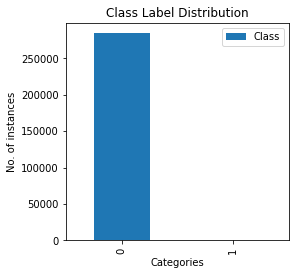

In [7]:
#REFERENCE: [19]
#graphical representaion of fraud and non fraud cases
ccDts['Class'].value_counts().plot(figsize=(4,4),kind='bar',legend='True')
pyp.title("Class Label Distribution")
pyp.xlabel("Categories")
pyp.ylabel("No. of instances")
pyp.show()

In [8]:
#REFERENCE: [17]
#The data will be into A and B, thus the fraud class  
A = ccDts.drop(['Class'], axis = 1) 
B = ccDts["Class"] 
print(A.shape) 
print(B.shape) 
#Data split into training and testing 
aTrain, aTest, bTrain, bTest = tts( A,B,test_size = 0.2) 

(284807, 30)
(284807,)


In [9]:
#REFERENCE: [17]
lReg = logReg() #build object
#get training data and labels
lReg = lReg.fit(aTrain, bTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
#REFERENCE: [17]
#get testing values
lrPred=lReg.predict(aTest)
#find accuracy predicted test values
lrAcc = accuracy_score(bTest,lrPred)
print('------ Logistic Regression ------ ')
print('Accuracy (Test): ',(lrAcc))
#find precision predicted test values
lrPrec = precision_score(bTest,lrPred)
print('Precision (Test): ',(lrPrec))
#find recall predicted test values
lrRS = recall_score(bTest,lrPred)
print('Recall (Test): ',(lrRS))
#find f1-score predicted test values
lrFS = f1_score(bTest,lrPred)
print('F1 Score (Test): ',(lrFS))

------ Logistic Regression ------ 
Accuracy (Test):  0.9987886661282961
Precision (Test):  0.6956521739130435
Recall (Test):  0.6095238095238096
F1 Score (Test):  0.6497461928934011


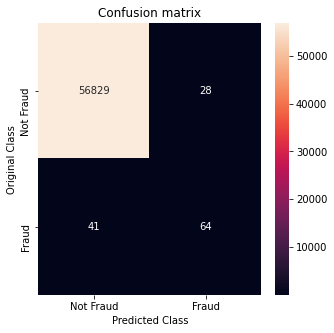

In [11]:
#Logistic Regression Confused Matrix
#REFERENCE: [17]
lblNames = ['Not Fraud', 'Fraud'] 
cM = confusion_matrix(bTest, lrPred) 
pyp.figure(figsize =(5, 5)) 
sbn.heatmap(cM, xticklabels = lblNames,  
            yticklabels = lblNames, annot = True, fmt ="d"); 
pyp.title("Confusion matrix") 
pyp.ylabel('Original Class') 
pyp.xlabel('Predicted Class') 
pyp.show() 

In [12]:
#REFERENCE: [17]
#Desicion Tree
#object model
dTreeC = deTrC()
dTreeC = dTreeC.fit(aTrain, bTrain)

In [13]:
#REFERENCE: [17]
#get testing values
dTreeCPred=dTreeC.predict(aTest)
#find accuracy predicted test values
dTCAcc = accuracy_score(bTest,dTreeCPred)
print('------ Decision Tree ------ ')
print('Accuracy (Test): ',(dTCAcc))
#find precision predicted test values
dTCPrec = precision_score(bTest,dTreeCPred)
print('Precision (Test): ',(dTCPrec))
#find recall predicted test values
dTCRS = recall_score(bTest,dTreeCPred)
print('Recall (Test): ',(dTCRS))
#find f1-score predicted test values
dTCFS = f1_score(bTest,dTreeCPred)
print('F1 Score (Test): ',(dTCFS))

------ Decision Tree ------ 
Accuracy (Test):  0.9989817773252344
Precision (Test):  0.7238095238095238
Recall (Test):  0.7238095238095238
F1 Score (Test):  0.7238095238095238


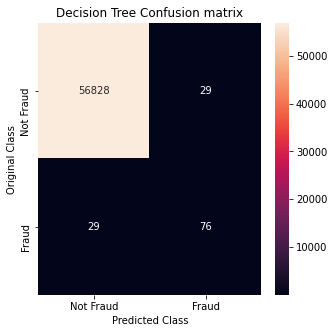

In [14]:
#Decision Tree Confused Matrix
#REFERENCE: [17]
lblNames = ['Not Fraud', 'Fraud']
#get testing labels and predicted testing values 
dtCM = confusion_matrix(bTest, dTreeCPred) 
pyp.figure(figsize =(5, 5)) 
sbn.heatmap(dtCM, xticklabels = lblNames,  
            yticklabels = lblNames, annot = True, fmt ="d"); 
pyp.title("Decision Tree Confusion matrix")
#name of y axis
pyp.ylabel('Original Class')
#name of x axis
pyp.xlabel('Predicted Class')
#show matrix
pyp.show() 

In [15]:
#REFERENCE: [17]
#Random Forest
#object model
randFC = ranFoC()
randFC = randFC.fit(aTrain, bTrain)

In [17]:
#REFERENCE: [17]
#get testing values
randFCPred=randFC.predict(aTest)
#find accuracy predicted test values
rFCAcc = accuracy_score(bTest,randFCPred)
print('------ Random Forest ------ ')
print('Accuracy (Test): ',(rFCAcc))
#find precision predicted test values
rFCPrec = precision_score(bTest,randFCPred)
print('Precision (Test): ',(rFCPrec))
#find recall predicted test values
rFCRS = recall_score(bTest,randFCPred)
print('Recall (Test): ',(rFCRS))
#find f1-score predicted test values
rFCFS = f1_score(bTest,randFCPred)
print('F1 Score (Test): ',(rFCFS))

------ Random Forest ------ 
Accuracy (Test):  0.9995786664794073
Precision (Test):  0.9655172413793104
Recall (Test):  0.8
F1 Score (Test):  0.8750000000000001


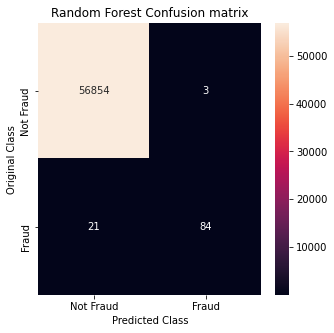

In [18]:
#Random Forest Confused Matrix
#REFERENCE: [17]
lblNames = ['Not Fraud', 'Fraud']
#get testing labels and predicted testing values 
rfCM = confusion_matrix(bTest, randFCPred) 
pyp.figure(figsize =(5, 5)) 
sbn.heatmap(rfCM, xticklabels = lblNames,  
            yticklabels = lblNames, annot = True, fmt ="d"); 
pyp.title("Random Forest Confusion matrix")
#name of y axis
pyp.ylabel('Original Class')
#name of x axis
pyp.xlabel('Predicted Class')
#show matrix
pyp.show() 

In [19]:
#REFERENCE: [17]
#Undersampling
ccNFraudI = list(ntCcFd.index)
ccFraudI= list(ccFd.index)
#Randomly selecting datapoints from the majority class
ranccNFraudID = random.sample(ccNFraudI, len(ccFraudI))
#Extracting the specified rows and creating the undersampled dataset
underSampleI=ccFraudI+ranccNFraudID
underSampleD = ccDts.iloc[underSampleI, :]
#Splitting the undersampled dataset into A and B
aUS = underSampleD.drop(['Class'], axis = 1) 
bUS = underSampleD["Class"] 

In [20]:
#REFERENCE: [17]
auTrain, auTest, buTrain, buTest = tts( aUS ,bUS,test_size = 0.2) 

In [21]:
#REFERENCE: [17]
#Logistic
ulReg = logReg() #build object
#get training data and labels
ulReg.fit(auTrain, buTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Random Forest
urandFC = ranFoC()
urandFC.fit(auTrain, buTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
#Desicion Tree
#object model
udTreeC = deTrC()
udTreeC.fit(auTrain, buTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
#REFERENCE: [17]
#LOGISTIC REGRESSION
ulrPred=ulReg.predict(auTest)
#find accuracy predicted test values
ulrAcc = accuracy_score(buTest,ulrPred)
#find precision predicted test values
ulrPrec = precision_score(buTest,ulrPred)
#find recall predicted test values
ulrRS = recall_score(buTest,ulrPred)
#find f1-score predicted test values
ulrFS = f1_score(buTest,ulrPred)

In [25]:
#DECISION TREE
udTreeCPred=udTreeC.predict(auTest)
udTCAcc = accuracy_score(buTest,udTreeCPred)
udTCPrec = precision_score(buTest,udTreeCPred)
udTCRS = recall_score(buTest,udTreeCPred)
udTCFS = f1_score(buTest,udTreeCPred)

In [26]:
#RANDOM FOREST
urandFCPred=urandFC.predict(auTest)
urFCAcc = accuracy_score(buTest,urandFCPred)
urFCPrec = precision_score(buTest,urandFCPred)
urFCRS = recall_score(buTest,urandFCPred)
urFCFS = f1_score(buTest,urandFCPred)

In [27]:
#REFERENCE [19]
#create table like to show logostic regression, decision tree and random forest undersampling results
#easier to view the results and to compare
print('Under Sampling')
print('\n                            Accuracy         Precision       Recall      F1 Score')
print('                           ----------      ------------    -------      ---------')

print('Logistic Regression :       {:.04}%           {:.04}%         {:.04}%       {:.04}%'.format(ulrAcc * 100, 
                                                                                                ulrPrec * 100, 
                                                                                                ulrRS * 100,
                                                                                                ulrFS * 100))
print('Decision Tree:              {:.04}%           {:.04}%        {:.04}%       {:.04}%'.format(udTCAcc * 100, 
                                                                                                udTCPrec * 100, 
                                                                                                udTCRS * 100,
                                                                                                udTCFS * 100))
print('Random Forest:              {:.04}%           {:.04}%        {:.04}%       {:.04}%'.format(urFCAcc * 100, 
                                                                                                urFCPrec * 100, 
                                                                                                urFCRS * 100,
                                                                                                urFCFS * 100))


Under Sampling

                            Accuracy         Precision       Recall      F1 Score
                           ----------      ------------    -------      ---------
Logistic Regression :       93.4%           93.9%         90.59%       92.22%
Decision Tree:              88.32%           87.8%        84.71%       86.23%
Random Forest:              94.42%           97.44%        89.41%       93.25%


In [28]:
#REFERENCE [17]
#OverSample
from imblearn.over_sampling import SMOTE
aOSTrain, bOSTrain = SMOTE().fit_sample(A, B)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
#show the transactions cases when data set was not altered, thus showing imbalance
#show when oversample the data set, spilt the fraud and not fraud cases the same.
print('Before Oversampling- Fraud Cases:     {}'.format(len(ccFd)))
print('Before Oversampling- Not Fraud Cases: {}'.format(len(ntCcFd))) 
print('Oversampling: Fraud Cases: ',         sum(bOSTrain==1))
print('Oversampling: Not Fraud Cases: ',     sum(bOSTrain==0))

Before Oversampling- Fraud Cases:     492
Before Oversampling- Not Fraud Cases: 284315
Oversampling: Fraud Cases:  284315
Oversampling: Not Fraud Cases:  284315


In [31]:
#REFERENCE: [17]
aoTrain, aoTest, boTrain, boTest = tts( aOSTrain ,bOSTrain,test_size = 0.2) 

In [32]:
#REFERENCE: [17]
#Logistic
olReg = logReg() #build object
#get training data and labels
olReg.fit(aOSTrain, bOSTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#Desicion Tree
odTreeC = deTrC()
odTreeC.fit(aOSTrain, bOSTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
#Random Forest
orandFC = ranFoC()
orandFC.fit(aOSTrain, bOSTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
#REFERENCE: [17]
#LOGISTIC REGRESSION
olrPred=olReg.predict(aoTest)
#find accuracy predicted test values
olrAcc = accuracy_score(boTest,olrPred)
#find precision predicted test values
olrPrec = precision_score(boTest,olrPred)
#find recall predicted test values
olrRS = recall_score(boTest,olrPred)
#find f1-score predicted test values
olrFS = f1_score(boTest,olrPred)
#DECISION TREE find the accuracy, precision, recall and f1 score
odTreeCPred=odTreeC.predict(aoTest)
odTCAcc = accuracy_score(boTest,odTreeCPred)
odTCPrec = precision_score(boTest,odTreeCPred)
odTCRS = recall_score(boTest,odTreeCPred)
odTCFS = f1_score(boTest,odTreeCPred)
#RANDOM FOREST find the accuracy, precision, recall and f1 score
orandFCPred=orandFC.predict(aoTest)
orFCAcc = accuracy_score(boTest,orandFCPred)
orFCPrec = precision_score(boTest,orandFCPred)
orFCRS = recall_score(boTest,orandFCPred)
orFCFS = f1_score(boTest,orandFCPred)

In [36]:
#REFERENCE [17]
#create table like to show logostic regression, decision tree and random forest oversampling results
#easier to view the results and to compare
print('Oversampling')
print('\n                            Accuracy         Precision       Recall      F1 Score')
print('                           ----------      ------------    -------      ---------')

print('Logistic Regression :       {:.04}%           {:.04}%         {:.04}%       {:.04}%'.format(olrAcc * 100, 
                                                                                                olrPrec * 100, 
                                                                                                olrRS * 100,
                                                                                                olrFS * 100))
print('Decision Tree:              {:.04}%           {:.04}%        {:.04}%       {:.04}%'.format(odTCAcc * 100, 
                                                                                                odTCPrec * 100, 
                                                                                                odTCRS * 100,
                                                                                                odTCFS * 100))
print('Random Forest:              {:.04}%           {:.04}%        {:.04}%       {:.04}%'.format(orFCAcc * 100, 
                                                                                                orFCPrec * 100, 
                                                                                                orFCRS * 100,
                                                                                                orFCFS * 100))

Oversampling

                            Accuracy         Precision       Recall      F1 Score
                           ----------      ------------    -------      ---------
Logistic Regression :       97.37%           98.24%         96.44%       97.33%
Decision Tree:              100.0%           100.0%        100.0%       100.0%
Random Forest:              100.0%           100.0%        100.0%       100.0%


In [40]:
#REFERENCE [22]
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
#create pipeline to pass through the random forest oversmapled model
pipeline = Pipeline(steps = [('s', StandardScaler()), ('m', orandFC)])
#pass through training values and labels though the model to train
pipeline.fit(aOSTrain, bOSTrain)
#save model to be used in other applications
joblib.dump(pipeline, '/content/drive/MyDrive/oversRFModel.joblib')


['/content/drive/MyDrive/oversRFModel.joblib']

In [41]:
#function to make prediction whether if fraud or not fraud
def makePreditcion(records):
  #REFERENCE [22]
  for line in records:
    #decide on prediction
    cpred = pipeline.predict_proba([line])
    #probability on either class
    answer = cpred[0][1]
    # if 0 then not fraud, else 1 then fraud
    if answer ==  0:
        print ('This transaction is Not Fraud')
    else:
        print ('This transaction is FRAUD')
    #print probabilty of prediction
    print('Prediction made=%.3f' % (answer))

In [42]:
#REFERENCE [22]
records = [[520,-1.5233365478263,1.95147851064158,-1.60947512229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0],
	[7519,1.23423504613468,3.0197404207034,-4.30459688479665,4.73279513041887,3.62420083055386,-1.35774566315358,1.71344498787235,-0.496358487073991,-1.28285782036322,-2.44746925511151,2.10134386504854,-4.6096283906446,1.46437762476188,-6.07933719308005,-0.339237372732577,2.58185095378146,6.73938438478335,3.04249317830411,-2.72185312222835,0.00906083639534526,-0.37906830709218,-0.704181032215427,-0.656804756348389,-1.63265295692929,1.48890144838237,0.566797273468934,-0.0100162234965625,0.146792734916988,1]]
makePreditcion(records) #call make prediction function

This transaction is FRAUD
Prediction made=1.000
This transaction is FRAUD
Prediction made=1.000


In [43]:
#REFERENCE [22]
records2 = [[0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62],
	[0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69]]
makePreditcion(records2) #call make prediction function

This transaction is Not Fraud
Prediction made=0.000
This transaction is Not Fraud
Prediction made=0.000
